In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pickle
import copy
import datetime

env_name = 'CustomPendulum-v0'

bif_c = 0.1
num_iter_max=10000
vae_lr=5e-4


In [2]:
import gym
import custom_gym
env = gym.make(env_name)
s_dim = env.reset().flatten().shape[0]
a_dim = env.action_space.sample().flatten().shape[0]
z_dim = 1
print(s_dim, a_dim, z_dim)

2 1 1


/home/proxima-hishinuma/anaconda3/envs/iwvi/lib/python3.8/site-packages/gym/core.py:329: DeprecationWarning: WARN: Initializing wrapper in old step API which returns one bool instead of two. It is recommended to set `new_step_api=True` to use new step API. This will be the default behaviour in future.
  deprecation(
/home/proxima-hishinuma/anaconda3/envs/iwvi/lib/python3.8/site-packages/gym/wrappers/step_api_compatibility.py:39: DeprecationWarning: WARN: Initializing environment in old step API which returns one bool instead of two. It is recommended to set `new_step_api=True` to use new step API. This will be the default behaviour in future.
  deprecation(
/home/proxima-hishinuma/anaconda3/envs/iwvi/lib/python3.8/site-packages/gym/utils/passive_env_checker.py:174: UserWarning: WARN: Future gym versions will require that `Env.reset` can be passed a `seed` instead of using `Env.seed` for resetting the environment random number generator.
  logger.warn(
/home/proxima-hishinuma/anaconda3/

In [3]:
from sac import SAC
agent = SAC(env.observation_space.shape[0], env.action_space)
agent.load_checkpoint(ckpt_path="checkpoints/sac_checkpoint_custom_pendulum_", evaluate=True)
agent.policy.my_np_compile()

Loading models from checkpoints/sac_checkpoint_custom_pendulum_


In [4]:
# # # # データ生成
# from get_offline_data import getOfflineData
# getOfflineData(env_name=env_name, episode_num=100)

In [5]:
offline_data = pickle.load(open("offline_data.pkl","rb"))

debug_info = pickle.load(open("offline_data_debug_info.pkl","rb"))
debug_info = np.array(debug_info)
print(debug_info.shape)
# c_array = debug_info[:,1]

# episode_index = 9
# plt.plot(offline_data[episode_index][:,0],offline_data[episode_index][:,1])
# print("env_param: ",debug_info[episode_index])

(100, 2)


In [6]:
import importlib
import vi_base
importlib.reload(vi_base)

args_init_dict = {"offline_data": offline_data,
             "s_dim": s_dim,
             "a_dim": a_dim,
             "z_dim": z_dim,
#              "policy":agent.select_action,
             "policy":agent.policy.my_np_select_action,
             "debug_info":debug_info,
             "env" : env}

vi = vi_base.baseVI(args_init_dict)


In [7]:
vi.get_real_rollout_data()

0  1  

/home/proxima-hishinuma/anaconda3/envs/iwvi/lib/python3.8/site-packages/gym/utils/passive_env_checker.py:227: DeprecationWarning: WARN: Core environment is written in old step API which returns one bool instead of two. It is recommended to rewrite the environment with new step API. 
  logger.deprecation(
/home/proxima-hishinuma/anaconda3/envs/iwvi/lib/python3.8/site-packages/gym/utils/passive_env_checker.py:233: DeprecationWarning: `np.bool8` is a deprecated alias for `np.bool_`.  (Deprecated NumPy 1.24)
  if not isinstance(done, (bool, np.bool8)):
/home/proxima-hishinuma/anaconda3/envs/iwvi/lib/python3.8/site-packages/gym/utils/passive_env_checker.py:141: UserWarning: WARN: The obs returned by the `step()` method was expecting numpy array dtype to be float32, actual type: float64
  logger.warn(
/home/proxima-hishinuma/anaconda3/envs/iwvi/lib/python3.8/site-packages/gym/utils/passive_env_checker.py:165: UserWarning: WARN: The obs returned by the `step()` method is not within the observ

2  3  4  5  6  7  8  9  10  11  12  13  14  15  16  17  18  19  20  21  22  23  24  25  26  27  28  29  30  31  32  33  34  35  36  37  38  39  40  41  42  43  44  45  46  47  48  49  50  51  52  53  54  55  56  57  58  59  60  61  62  63  64  65  66  67  68  69  70  71  72  73  74  75  76  77  78  79  80  81  82  83  84  85  86  87  88  89  90  91  92  93  94  95  96  97  98  99   


tensor(2.8330)tensor(6.4749)tensor(5.2778)tensor(4.9017)tensor(2.9698)tensor(9.6140)tensor(3.4960)tensor(4.4339)tensor(3.6634)tensor(4.1051)tensor(3.8289)tensor(7.3527)tensor(4.2839)tensor(7.1324)tensor(8.5549)tensor(9.5053)tensor(5.1862)tensor(6.2448)tensor(3.2380)tensor(4.6179)tensor(6.9106)tensor(6.1630)tensor(4.6974)tensor(3.1409)tensor(6.1055)tensor(6.9212)tensor(3.6279)tensor(5.0028)tensor(4.4461)tensor(3.4110)tensor(5.4212)tensor(3.0558)tensor(6.9153)tensor(5.9164)tensor(5.6316)tensor(10.)tensor(5.3057)tensor(4.1543)tensor(4.9349)tensor(6.5062)tensor(5.7659)tensor(3.6379)tensor(7.7655)tensor(4.1452)tensor(4.3297)tensor(6.4458)tensor(4.1032)tensor(3.5447)tensor(5.9673)tensor(4.6048)tensor(2.7983)tensor(3.4896)tensor(6.6367)tensor(3.5696)tensor(7.7458)tensor(3.1576)tensor(3.3562)tensor(5.6942)tensor(3.5629)tensor(5.5337)tensor(6.5587)tensor(2.4693)tensor(3.3149)tensor(3.4391)tensor(4.6163)tensor(5.3689)tensor(6.5360)tensor(2.7579)tensor(3.3110)tensor(5.8046)tensor(3.2051)tensor(5.

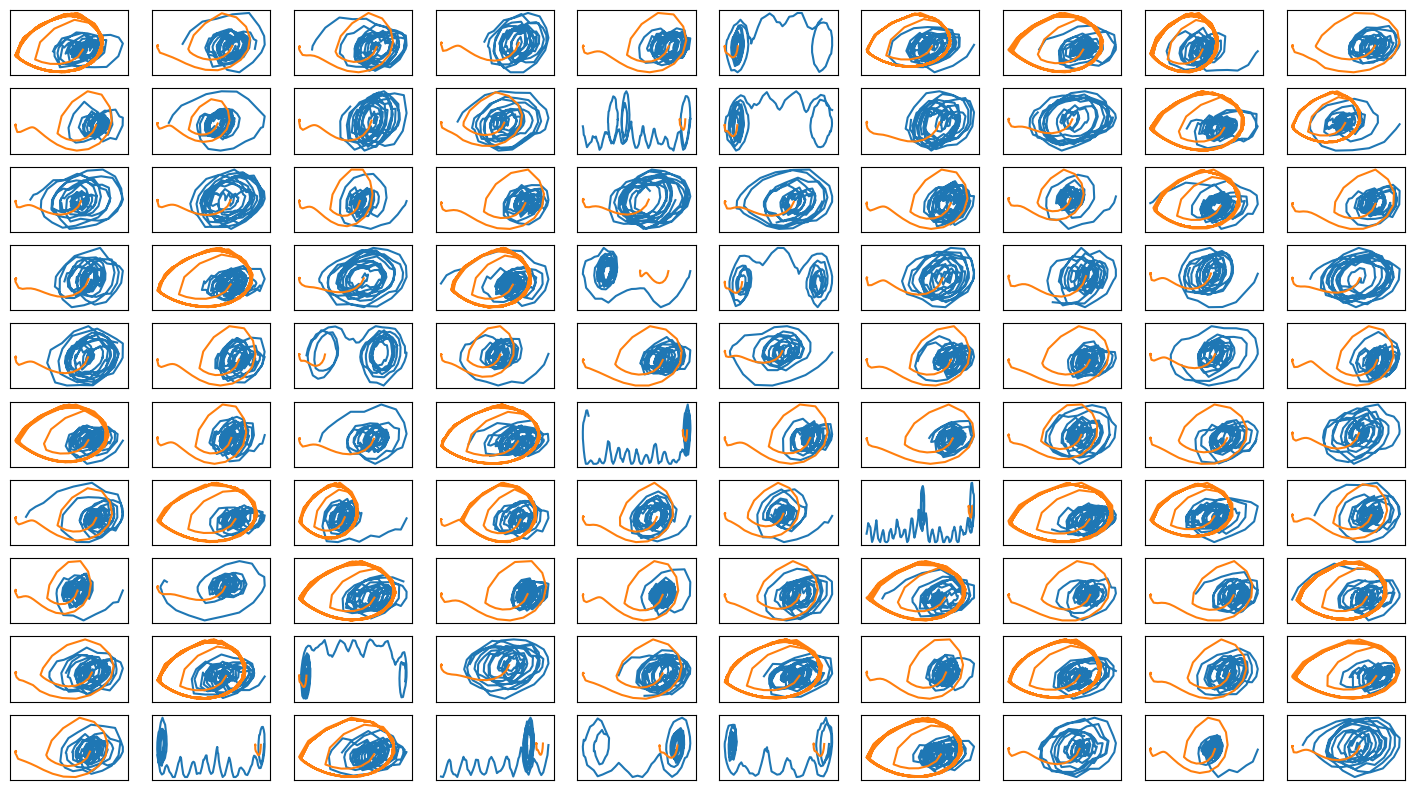

In [8]:
fig = plt.figure(figsize=(18,10*int(len(offline_data)//100)))
ax_list = []
for i in range(len(offline_data)):
    print(vi.offline_data[i][:,1].max(), end="")
    ax_list.append(fig.add_subplot(len(offline_data)//10, 10, i+1))
    ax_list[-1].set_xticks([])
    ax_list[-1].set_yticks([])
    ax_list[-1].plot(vi.offline_data[i][:,0], vi.offline_data[i][:,1]) 
    ax_list[-1].plot(vi.debug_realenv_rolloutdata[i][:,0], vi.debug_realenv_rolloutdata[i][:,1]) 
print("オフラインデータvs実環境方策rollout")
plt.show()

train_weighted_vae: enc_dec
train: iter 0  trainloss 2780.58774  validloss 1741.63236±0.00000  bestvalidloss 1741.63236  last_update 0
train: iter 1  trainloss 826.61040  validloss 610.73962±0.00000  bestvalidloss 610.73962  last_update 0
train: iter 2  trainloss 595.35932  validloss 516.46179±0.00000  bestvalidloss 516.46179  last_update 0
train: iter 3  trainloss 497.67289  validloss 491.49501±0.00000  bestvalidloss 491.49501  last_update 0
train: iter 4  trainloss 454.89144  validloss 466.60141±0.00000  bestvalidloss 466.60141  last_update 0
train: iter 5  trainloss 420.27870  validloss 436.53994±0.00000  bestvalidloss 436.53994  last_update 0
train: iter 6  trainloss 441.31980  validloss 427.83262±0.00000  bestvalidloss 427.83262  last_update 0
train: iter 7  trainloss 388.66457  validloss 413.30630±0.00000  bestvalidloss 413.30630  last_update 0
train: iter 8  trainloss 377.01486  validloss 399.47457±0.00000  bestvalidloss 399.47457  last_update 0
train: iter 9  trainloss 332.1263

train: iter 77  trainloss -469.72579  validloss -379.56181±0.00000  bestvalidloss -447.92561  last_update 3
train: iter 78  trainloss -489.42491  validloss -376.41363±0.00000  bestvalidloss -447.92561  last_update 4
train: iter 79  trainloss -502.76756  validloss -401.62641±0.00000  bestvalidloss -447.92561  last_update 5
train: iter 80  trainloss -429.35266  validloss -459.44443±0.00000  bestvalidloss -459.44443  last_update 0
train: iter 81  trainloss -453.56376  validloss -216.81029±0.00000  bestvalidloss -459.44443  last_update 1
train: iter 82  trainloss -510.39613  validloss -463.30230±0.00000  bestvalidloss -463.30230  last_update 0
train: iter 83  trainloss -484.25254  validloss -427.32012±0.00000  bestvalidloss -463.30230  last_update 1
train: iter 84  trainloss -491.56741  validloss -434.23078±0.00000  bestvalidloss -463.30230  last_update 2
train: iter 85  trainloss -499.77997  validloss -440.83627±0.00000  bestvalidloss -463.30230  last_update 3
train: iter 86  trainloss -5

train: iter 153  trainloss -626.56295  validloss -576.58798±0.00000  bestvalidloss -576.58798  last_update 0
train: iter 154  trainloss -621.85956  validloss -582.75447±0.00000  bestvalidloss -582.75447  last_update 0
train: iter 155  trainloss -602.15906  validloss -550.39185±0.00000  bestvalidloss -582.75447  last_update 1
train: iter 156  trainloss -590.45247  validloss -554.41417±0.00000  bestvalidloss -582.75447  last_update 2
train: iter 157  trainloss -588.23663  validloss -571.07230±0.00000  bestvalidloss -582.75447  last_update 3
train: iter 158  trainloss -619.58878  validloss -575.20194±0.00000  bestvalidloss -582.75447  last_update 4
train: iter 159  trainloss -584.82349  validloss -587.60126±0.00000  bestvalidloss -587.60126  last_update 0
train: iter 160  trainloss -627.47198  validloss -547.24619±0.00000  bestvalidloss -587.60126  last_update 1
train: iter 161  trainloss -638.51572  validloss -600.56604±0.00000  bestvalidloss -600.56604  last_update 0
train: iter 162  tr

train: iter 229  trainloss -684.42419  validloss -634.66080±0.00000  bestvalidloss -649.67307  last_update 6
train: iter 230  trainloss -683.56575  validloss -648.05132±0.00000  bestvalidloss -649.67307  last_update 7
train: iter 231  trainloss -680.01999  validloss -619.64925±0.00000  bestvalidloss -649.67307  last_update 8
train: iter 232  trainloss -659.26938  validloss -653.19277±0.00000  bestvalidloss -653.19277  last_update 0
train: iter 233  trainloss -674.84078  validloss -630.39293±0.00000  bestvalidloss -653.19277  last_update 1
train: iter 234  trainloss -670.49678  validloss -631.46963±0.00000  bestvalidloss -653.19277  last_update 2
train: iter 235  trainloss -676.27172  validloss -588.14016±0.00000  bestvalidloss -653.19277  last_update 3
train: iter 236  trainloss -663.90245  validloss -630.11075±0.00000  bestvalidloss -653.19277  last_update 4
train: iter 237  trainloss -651.94722  validloss -584.75676±0.00000  bestvalidloss -653.19277  last_update 5
train: iter 238  tr

train: iter 304  trainloss -675.78432  validloss -631.83347±0.00000  bestvalidloss -672.02835  last_update 28
train: iter 305  trainloss -682.34205  validloss -663.80146±0.00000  bestvalidloss -672.02835  last_update 29
train: iter 306  trainloss -701.27790  validloss -673.95897±0.00000  bestvalidloss -673.95897  last_update 0
train: iter 307  trainloss -712.09593  validloss -666.35334±0.00000  bestvalidloss -673.95897  last_update 1
train: iter 308  trainloss -698.10127  validloss -667.74741±0.00000  bestvalidloss -673.95897  last_update 2
train: iter 309  trainloss -686.06949  validloss -664.32272±0.00000  bestvalidloss -673.95897  last_update 3
train: iter 310  trainloss -706.36454  validloss -648.22675±0.00000  bestvalidloss -673.95897  last_update 4
train: iter 311  trainloss -701.95536  validloss -660.50452±0.00000  bestvalidloss -673.95897  last_update 5
train: iter 312  trainloss -665.07339  validloss -670.78336±0.00000  bestvalidloss -673.95897  last_update 6
train: iter 313  

train: iter 379  trainloss -703.36944  validloss -638.51014±0.00000  bestvalidloss -686.69144  last_update 10
train: iter 380  trainloss -706.53132  validloss -634.20335±0.00000  bestvalidloss -686.69144  last_update 11
train: iter 381  trainloss -688.86146  validloss -675.66980±0.00000  bestvalidloss -686.69144  last_update 12
train: iter 382  trainloss -695.48742  validloss -662.13206±0.00000  bestvalidloss -686.69144  last_update 13
train: iter 383  trainloss -704.76041  validloss -655.36528±0.00000  bestvalidloss -686.69144  last_update 14
train: iter 384  trainloss -697.32924  validloss -653.09811±0.00000  bestvalidloss -686.69144  last_update 15
train: iter 385  trainloss -715.98436  validloss -684.08711±0.00000  bestvalidloss -686.69144  last_update 16
train: iter 386  trainloss -694.83163  validloss -663.91850±0.00000  bestvalidloss -686.69144  last_update 17
train: iter 387  trainloss -711.10861  validloss -653.27948±0.00000  bestvalidloss -686.69144  last_update 18
train: ite

train: iter 454  trainloss -678.31660  validloss -603.39749±0.00000  bestvalidloss -696.30388  last_update 8
train: iter 455  trainloss -711.05127  validloss -653.96393±0.00000  bestvalidloss -696.30388  last_update 9
train: iter 456  trainloss -705.72191  validloss -681.50085±0.00000  bestvalidloss -696.30388  last_update 10
train: iter 457  trainloss -725.80278  validloss -634.15464±0.00000  bestvalidloss -696.30388  last_update 11
train: iter 458  trainloss -707.98460  validloss -646.28908±0.00000  bestvalidloss -696.30388  last_update 12
train: iter 459  trainloss -720.60505  validloss -640.00172±0.00000  bestvalidloss -696.30388  last_update 13
train: iter 460  trainloss -712.61986  validloss -666.26070±0.00000  bestvalidloss -696.30388  last_update 14
train: iter 461  trainloss -691.92846  validloss -693.20839±0.00000  bestvalidloss -696.30388  last_update 15
train: iter 462  trainloss -695.81274  validloss -655.00317±0.00000  bestvalidloss -696.30388  last_update 16
train: iter 

train: iter 529  trainloss -706.66885  validloss -672.20468±0.00000  bestvalidloss -701.79457  last_update 18
train: iter 530  trainloss -703.55752  validloss -632.41517±0.00000  bestvalidloss -701.79457  last_update 19
train: iter 531  trainloss -714.60822  validloss -630.23068±0.00000  bestvalidloss -701.79457  last_update 20
train: iter 532  trainloss -715.56215  validloss -671.55271±0.00000  bestvalidloss -701.79457  last_update 21
train: iter 533  trainloss -723.59105  validloss -695.73443±0.00000  bestvalidloss -701.79457  last_update 22
train: iter 534  trainloss -716.75834  validloss -664.29240±0.00000  bestvalidloss -701.79457  last_update 23
train: iter 535  trainloss -716.05294  validloss -693.04621±0.00000  bestvalidloss -701.79457  last_update 24
train: iter 536  trainloss -723.35835  validloss -696.73405±0.00000  bestvalidloss -701.79457  last_update 25
train: iter 537  trainloss -732.45419  validloss -689.19415±0.00000  bestvalidloss -701.79457  last_update 26
train: ite

train: iter 604  trainloss -699.60671  validloss -622.76313±0.00000  bestvalidloss -703.23871  last_update 35
train: iter 605  trainloss -723.15982  validloss -701.36545±0.00000  bestvalidloss -703.23871  last_update 36
train: iter 606  trainloss -722.05652  validloss -684.50083±0.00000  bestvalidloss -703.23871  last_update 37
train: iter 607  trainloss -729.04047  validloss -567.27727±0.00000  bestvalidloss -703.23871  last_update 38
train: iter 608  trainloss -721.65620  validloss -703.85517±0.00000  bestvalidloss -703.85517  last_update 0
train: iter 609  trainloss -716.37846  validloss -600.66486±0.00000  bestvalidloss -703.85517  last_update 1
train: iter 610  trainloss -724.66899  validloss -667.72552±0.00000  bestvalidloss -703.85517  last_update 2
train: iter 611  trainloss -687.98195  validloss -300.55308±0.00000  bestvalidloss -703.85517  last_update 3
train: iter 612  trainloss -722.73844  validloss -700.68410±0.00000  bestvalidloss -703.85517  last_update 4
train: iter 613

train: iter 679  trainloss -708.09150  validloss -669.02123±0.00000  bestvalidloss -710.61429  last_update 29
train: iter 680  trainloss -739.19165  validloss -697.71694±0.00000  bestvalidloss -710.61429  last_update 30
train: iter 681  trainloss -729.88750  validloss -705.66665±0.00000  bestvalidloss -710.61429  last_update 31
train: iter 682  trainloss -732.85883  validloss -681.66372±0.00000  bestvalidloss -710.61429  last_update 32
train: iter 683  trainloss -747.27379  validloss -700.22148±0.00000  bestvalidloss -710.61429  last_update 33
train: iter 684  trainloss -706.78117  validloss -690.78793±0.00000  bestvalidloss -710.61429  last_update 34
train: iter 685  trainloss -714.19704  validloss -667.30830±0.00000  bestvalidloss -710.61429  last_update 35
train: iter 686  trainloss -741.36947  validloss -694.55857±0.00000  bestvalidloss -710.61429  last_update 36
train: iter 687  trainloss -725.63423  validloss -667.85962±0.00000  bestvalidloss -710.61429  last_update 37
train: ite

train: iter 754  trainloss -755.91480  validloss -668.26588±0.00000  bestvalidloss -714.98590  last_update 56
train: iter 755  trainloss -711.89792  validloss -691.45386±0.00000  bestvalidloss -714.98590  last_update 57
train: iter 756  trainloss -742.75361  validloss -689.98910±0.00000  bestvalidloss -714.98590  last_update 58
train: iter 757  trainloss -720.77113  validloss -647.48054±0.00000  bestvalidloss -714.98590  last_update 59
train: iter 758  trainloss -700.82859  validloss -693.63991±0.00000  bestvalidloss -714.98590  last_update 60
train: iter 759  trainloss -748.26739  validloss -664.35333±0.00000  bestvalidloss -714.98590  last_update 61
train: iter 760  trainloss -707.72802  validloss -708.96125±0.00000  bestvalidloss -714.98590  last_update 62
train: iter 761  trainloss -743.88653  validloss -690.12059±0.00000  bestvalidloss -714.98590  last_update 63
train: iter 762  trainloss -754.14045  validloss -719.19411±0.00000  bestvalidloss -719.19411  last_update 0
train: iter

train: iter 829  trainloss -738.87572  validloss -686.83009±0.00000  bestvalidloss -720.45512  last_update 2
train: iter 830  trainloss -757.23283  validloss -713.45802±0.00000  bestvalidloss -720.45512  last_update 3
train: iter 831  trainloss -718.07274  validloss -682.25879±0.00000  bestvalidloss -720.45512  last_update 4
train: iter 832  trainloss -700.59496  validloss -690.44497±0.00000  bestvalidloss -720.45512  last_update 5
train: iter 833  trainloss -712.36947  validloss -624.28356±0.00000  bestvalidloss -720.45512  last_update 6
train: iter 834  trainloss -735.45855  validloss -647.42553±0.00000  bestvalidloss -720.45512  last_update 7
train: iter 835  trainloss -715.38597  validloss -657.15345±0.00000  bestvalidloss -720.45512  last_update 8
train: iter 836  trainloss -739.75143  validloss -702.83392±0.00000  bestvalidloss -720.45512  last_update 9
train: iter 837  trainloss -747.72254  validloss -680.86479±0.00000  bestvalidloss -720.45512  last_update 10
train: iter 838  t

train: iter 904  trainloss -761.56874  validloss -708.25086±0.00000  bestvalidloss -720.45512  last_update 77
train: iter 905  trainloss -729.76041  validloss -686.35956±0.00000  bestvalidloss -720.45512  last_update 78
train: iter 906  trainloss -726.60387  validloss -658.95605±0.00000  bestvalidloss -720.45512  last_update 79
train: iter 907  trainloss -736.31187  validloss -676.22066±0.00000  bestvalidloss -720.45512  last_update 80
train: iter 908  trainloss -742.95952  validloss -703.32309±0.00000  bestvalidloss -720.45512  last_update 81
train: iter 909  trainloss -745.07204  validloss -711.91018±0.00000  bestvalidloss -720.45512  last_update 82
train: iter 910  trainloss -751.49236  validloss -710.74450±0.00000  bestvalidloss -720.45512  last_update 83
train: iter 911  trainloss -722.94468  validloss -683.78815±0.00000  bestvalidloss -720.45512  last_update 84
train: iter 912  trainloss -716.64055  validloss -685.46485±0.00000  bestvalidloss -720.45512  last_update 85
train: ite

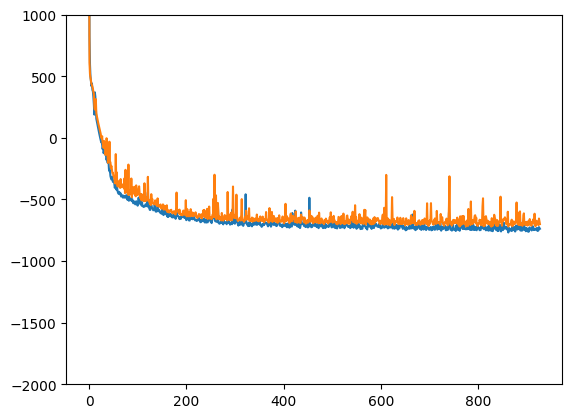

train_weighted_vae: enc
train: iter 0  trainloss -753.36667  validloss -723.75073±0.00000  bestvalidloss -723.75073  last_update 0
train: iter 1  trainloss -739.87203  validloss -654.00692±0.00000  bestvalidloss -723.75073  last_update 1
train: iter 2  trainloss -759.46249  validloss -714.43550±0.00000  bestvalidloss -723.75073  last_update 2
train: iter 3  trainloss -761.07559  validloss -707.96821±0.00000  bestvalidloss -723.75073  last_update 3
train: iter 4  trainloss -765.31572  validloss -695.41973±0.00000  bestvalidloss -723.75073  last_update 4
train: iter 5  trainloss -765.50982  validloss -686.62238±0.00000  bestvalidloss -723.75073  last_update 5
train: iter 6  trainloss -763.99942  validloss -711.08565±0.00000  bestvalidloss -723.75073  last_update 6
train: iter 7  trainloss -760.79834  validloss -705.39160±0.00000  bestvalidloss -723.75073  last_update 7
train: iter 8  trainloss -766.94783  validloss -707.71399±0.00000  bestvalidloss -723.75073  last_update 8
train: iter 9

train: iter 77  trainloss -758.61596  validloss -712.87210±0.00000  bestvalidloss -723.75073  last_update 77
train: iter 78  trainloss -759.60398  validloss -698.23855±0.00000  bestvalidloss -723.75073  last_update 78
train: iter 79  trainloss -764.64913  validloss -714.59732±0.00000  bestvalidloss -723.75073  last_update 79
train: iter 80  trainloss -729.83600  validloss -708.10008±0.00000  bestvalidloss -723.75073  last_update 80
train: iter 81  trainloss -739.59181  validloss -707.60559±0.00000  bestvalidloss -723.75073  last_update 81
train: iter 82  trainloss -766.19060  validloss -712.76696±0.00000  bestvalidloss -723.75073  last_update 82
train: iter 83  trainloss -759.74534  validloss -714.08330±0.00000  bestvalidloss -723.75073  last_update 83
train: iter 84  trainloss -748.86835  validloss -697.80386±0.00000  bestvalidloss -723.75073  last_update 84
train: iter 85  trainloss -766.54755  validloss -707.67209±0.00000  bestvalidloss -723.75073  last_update 85
train: iter 86  tra

train: iter 52  trainloss -739.87170  validloss -719.97520±0.00000  bestvalidloss -725.82827  last_update 42
train: iter 53  trainloss -754.78833  validloss -663.72787±0.00000  bestvalidloss -725.82827  last_update 43
train: iter 54  trainloss -737.18130  validloss -711.96300±0.00000  bestvalidloss -725.82827  last_update 44
train: iter 55  trainloss -758.62239  validloss -712.58627±0.00000  bestvalidloss -725.82827  last_update 45
train: iter 56  trainloss -757.61913  validloss -703.42843±0.00000  bestvalidloss -725.82827  last_update 46
train: iter 57  trainloss -739.52347  validloss -697.79408±0.00000  bestvalidloss -725.82827  last_update 47
train: iter 58  trainloss -757.74088  validloss -699.36270±0.00000  bestvalidloss -725.82827  last_update 48
train: iter 59  trainloss -758.36418  validloss -680.11729±0.00000  bestvalidloss -725.82827  last_update 49
train: iter 60  trainloss -756.09414  validloss -719.15498±0.00000  bestvalidloss -725.82827  last_update 50
train: iter 61  tra

train: iter 128  trainloss -747.48362  validloss -676.16309±0.00000  bestvalidloss -726.50335  last_update 32
train: iter 129  trainloss -758.14543  validloss -717.18356±0.00000  bestvalidloss -726.50335  last_update 33
train: iter 130  trainloss -753.85259  validloss -716.54536±0.00000  bestvalidloss -726.50335  last_update 34
train: iter 131  trainloss -746.83679  validloss -707.13933±0.00000  bestvalidloss -726.50335  last_update 35
train: iter 132  trainloss -767.54737  validloss -715.50057±0.00000  bestvalidloss -726.50335  last_update 36
train: iter 133  trainloss -760.50030  validloss -711.35932±0.00000  bestvalidloss -726.50335  last_update 37
train: iter 134  trainloss -759.43116  validloss -711.86366±0.00000  bestvalidloss -726.50335  last_update 38
train: iter 135  trainloss -735.74066  validloss -691.99493±0.00000  bestvalidloss -726.50335  last_update 39
train: iter 136  trainloss -748.95145  validloss -693.48157±0.00000  bestvalidloss -726.50335  last_update 40
train: ite

train: iter 203  trainloss -768.70807  validloss -714.71084±0.00000  bestvalidloss -732.82239  last_update 27
train: iter 204  trainloss -751.20188  validloss -725.24604±0.00000  bestvalidloss -732.82239  last_update 28
train: iter 205  trainloss -764.09763  validloss -707.51375±0.00000  bestvalidloss -732.82239  last_update 29
train: iter 206  trainloss -751.78339  validloss -694.72186±0.00000  bestvalidloss -732.82239  last_update 30
train: iter 207  trainloss -767.76999  validloss -730.19710±0.00000  bestvalidloss -732.82239  last_update 31
train: iter 208  trainloss -752.74908  validloss -686.71199±0.00000  bestvalidloss -732.82239  last_update 32
train: iter 209  trainloss -756.01791  validloss -721.08880±0.00000  bestvalidloss -732.82239  last_update 33
train: iter 210  trainloss -750.49461  validloss -701.83831±0.00000  bestvalidloss -732.82239  last_update 34
train: iter 211  trainloss -753.14882  validloss -692.93656±0.00000  bestvalidloss -732.82239  last_update 35
train: ite

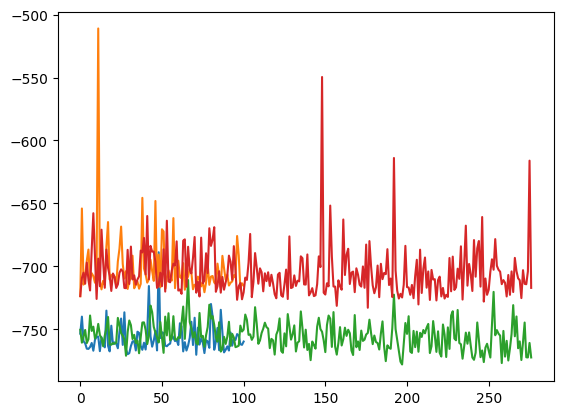

In [9]:
train_curve, valid_curve = vi.train_unweighted_vae(num_iter=num_iter_max, lr=vae_lr, early_stop_step=100, flag=1)
vi.update_mulogvar_list_for_mixture_of_gaussian_belief()
vi.save()
plt.plot(train_curve)
plt.plot(valid_curve)
plt.ylim([-2000, 1000])
plt.show()

train_curve, valid_curve = vi.train_unweighted_vae(num_iter=num_iter_max, lr=vae_lr, early_stop_step=100, flag=2)
vi.update_mulogvar_list_for_mixture_of_gaussian_belief()
vi.save()
plt.plot(train_curve)
plt.plot(valid_curve)
#
#plt.show()

train_curve, valid_curve = vi.train_unweighted_vae(num_iter=num_iter_max, lr=vae_lr, early_stop_step=100, flag=3)
vi.update_mulogvar_list_for_mixture_of_gaussian_belief()
vi.save()
plt.plot(train_curve)
plt.plot(valid_curve)

# y_min = max(-2000, min(max(train_curve),max(valid_curve)))
# y_max = min(1000, max(min(train_curve),min(valid_curve)))
# plt.ylim([y_min, y_max])
plt.show()


In [10]:
vi.load()
vi.update_mulogvar_list_for_mixture_of_gaussian_belief()

load vi_base_ckpt


0  1  2  3  4  5  6  7  8  9  10  11  12  13  14  15  16  17  18  19  20  21  22  23  24  25  26  27  28  29  30  31  32  33  34  35  36  37  38  39  40  41  42  43  44  45  46  47  48  49  50  51  52  53  54  55  56  57  58  59  60  61  62  63  64  65  66  67  68  69  70  71  72  73  74  75  76  77  78  79  80  81  82  83  84  85  86  87  88  89  90  91  92  93  94  95  96  97  98  99   
0  1  2  3  4  5  6  7  8  9  10  11  12  13  14  15  16  17  18  19  20  21  22  23  24  25  26  27  28  29  30  31  32  33  34  35  36  37  38  39  40  41  42  43  44  45  46  47  48  49  50  51  52  53  54  55  56  57  58  59  60  61  62  63  64  65  66  67  68  69  70  71  72  73  74  75  76  77  78  79  80  81  82  83  84  85  86  87  88  89  90  91  92  93  94  95  96  97  98  99   
0  1  2  3  4  5  6  7  8  9  10  11  12  13  14  15  16  17  18  19  20  21  22  23  24  25  26  27  28  29  30  31  32  33  34  35  36  37  38  39  40  41  42  43  44  45  46  47  48  49  50  51  52  53  54  55  56

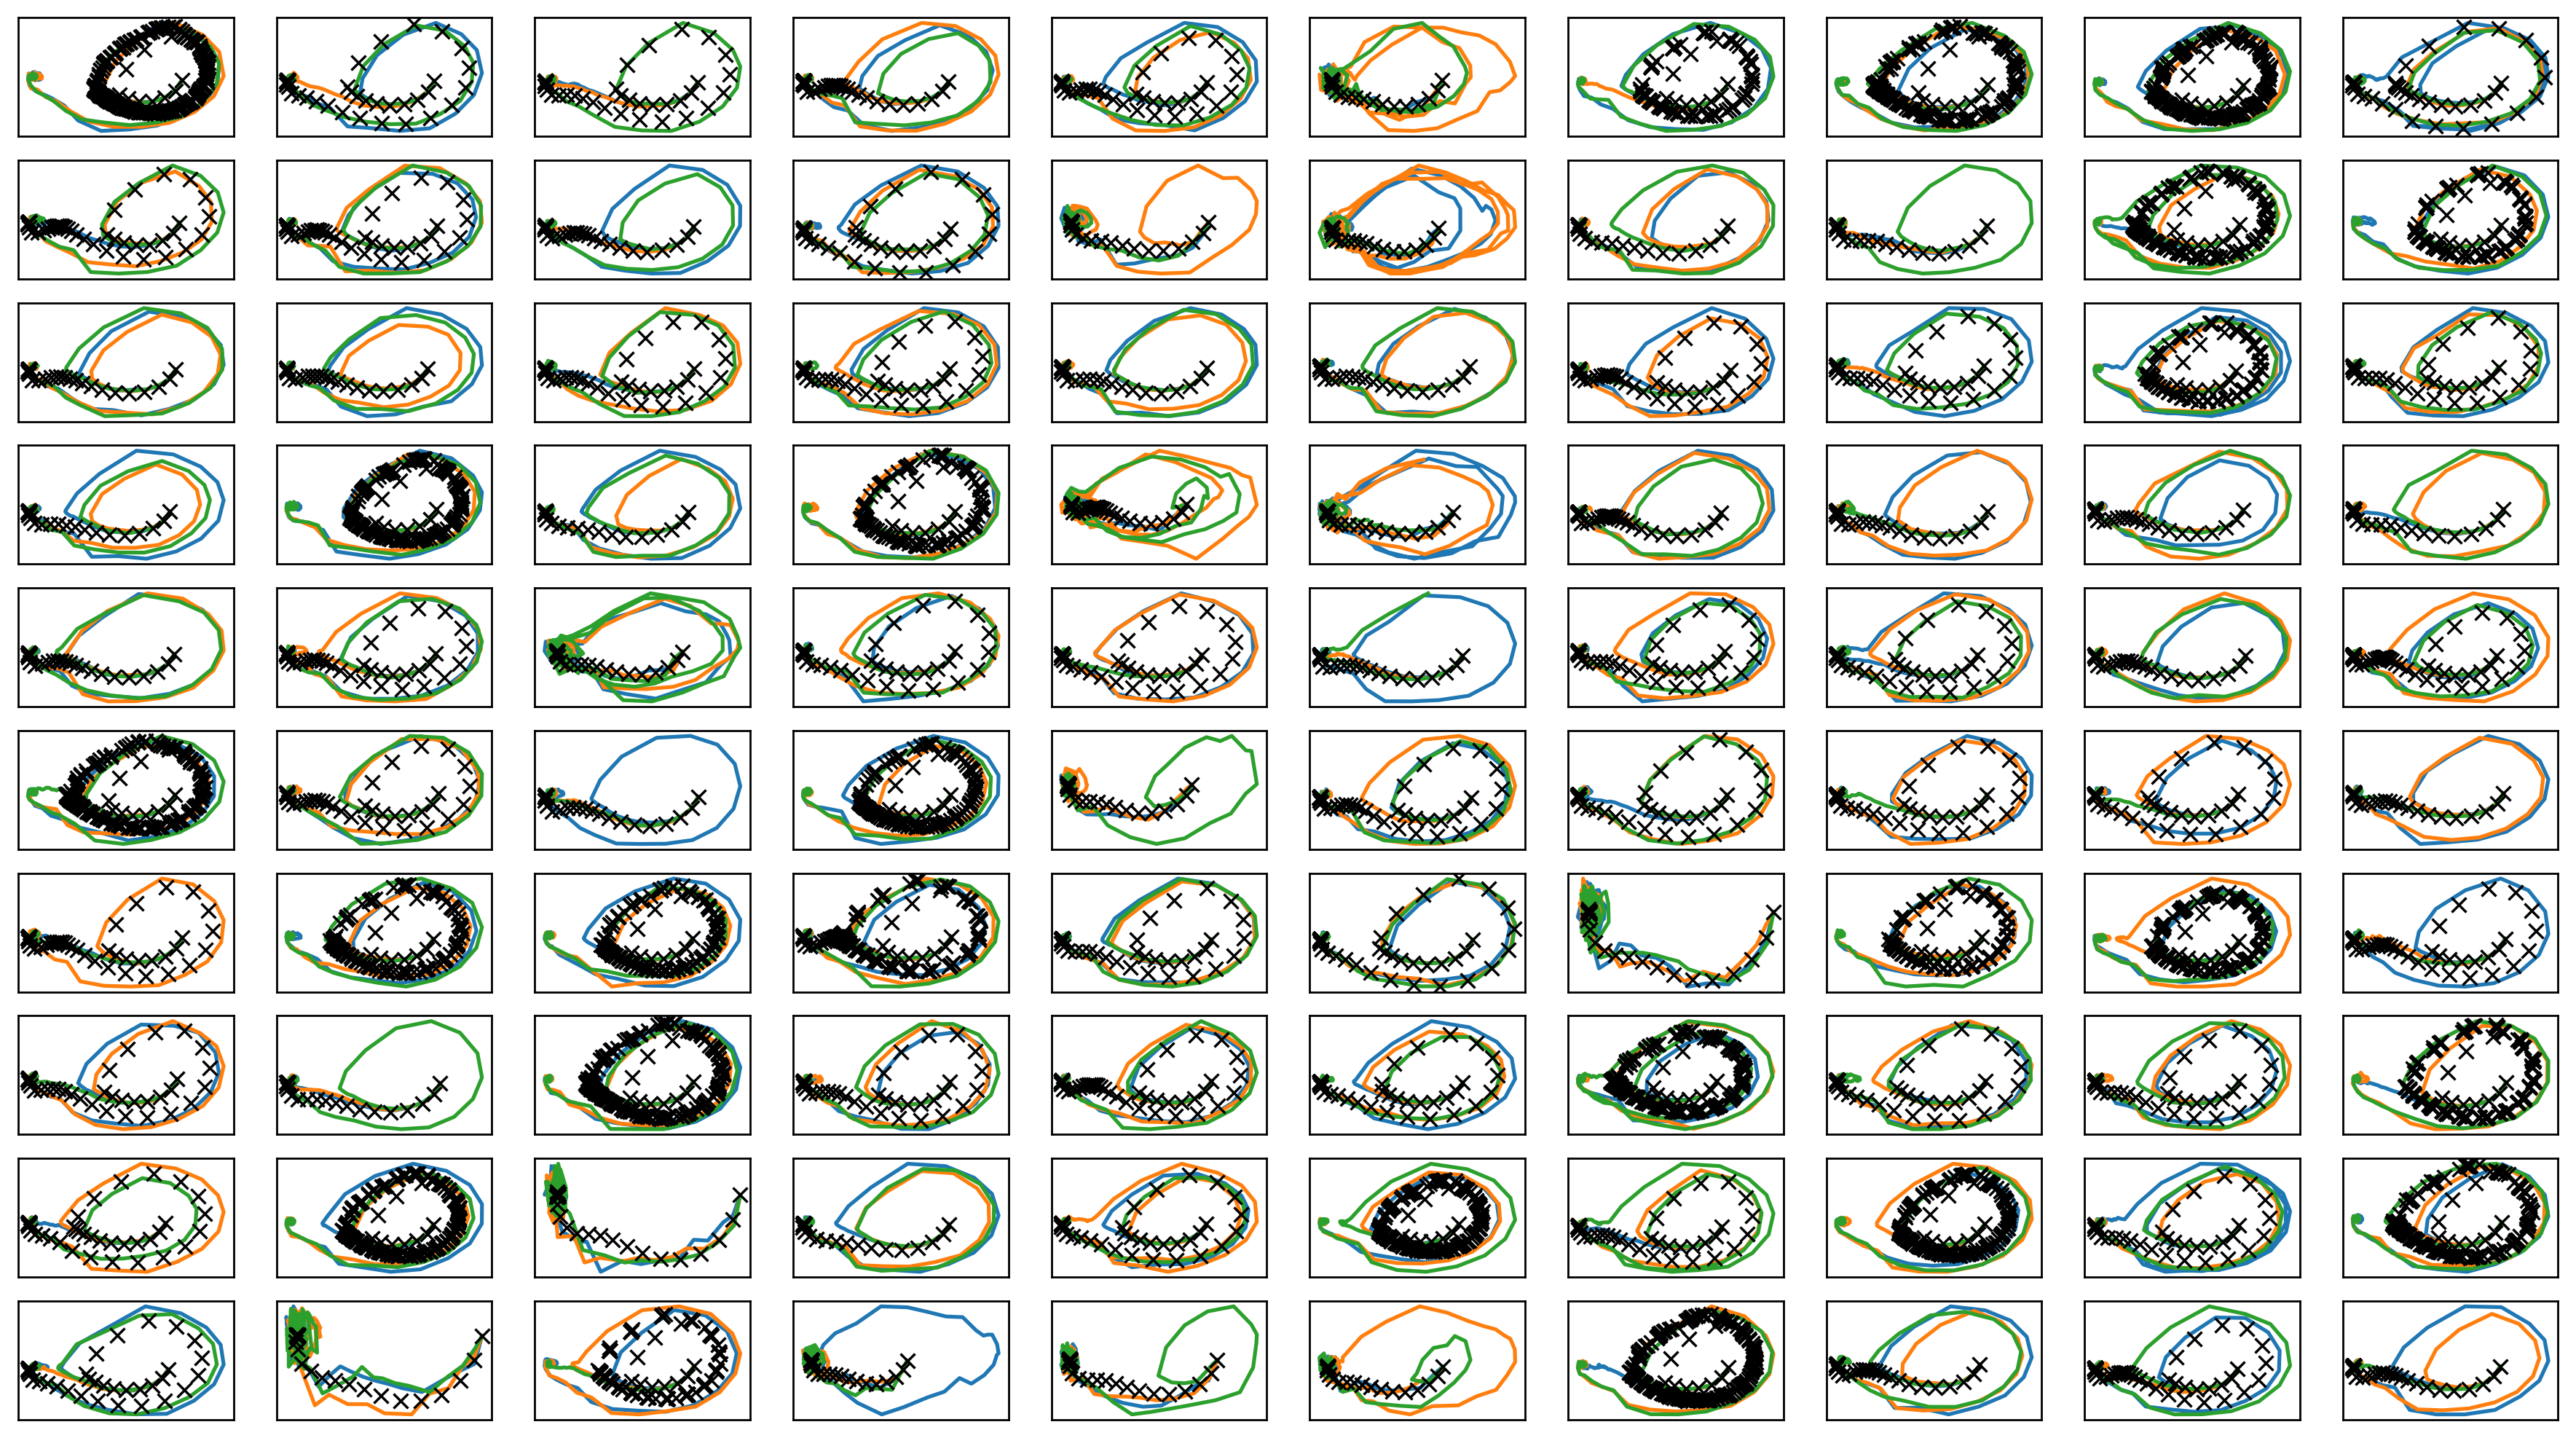

In [11]:
vi.get_sim_rollout_data_fixlen(update_belief=False)
simdata1 = copy.deepcopy(vi.simenv_rolloutdata)
vi.get_sim_rollout_data_fixlen(update_belief=False)
simdata2 = copy.deepcopy(vi.simenv_rolloutdata)
vi.get_sim_rollout_data_fixlen(update_belief=False)
simdata3 = copy.deepcopy(vi.simenv_rolloutdata)
# vi.get_sim_rollout_data_fixlen()
# simdata4 = copy.deepcopy(vi.simenv_rolloutdata)
# vi.get_sim_rollout_data_fixlen()
# simdata5 = copy.deepcopy(vi.simenv_rolloutdata)


fig = plt.figure(figsize=(18,10*int(len(offline_data)//100)), dpi=250)
fig.patch.set_facecolor('white')
ax_list = []
for i in range(len(offline_data)):
    ax_list.append(fig.add_subplot(len(offline_data)//10, 10, i+1))
    ax_list[-1].set_xticks([])
    ax_list[-1].set_yticks([])
    ax_list[-1].plot(simdata1[i][:,0], simdata1[i][:,1]) 
    ax_list[-1].plot(simdata2[i][:,0], simdata2[i][:,1]) 
    ax_list[-1].plot(simdata3[i][:,0], simdata3[i][:,1]) 
#     ax_list[-1].plot(simdata4[i][:,0], simdata4[i][:,1]) 
#     ax_list[-1].plot(simdata5[i][:,0], simdata5[i][:,1]) 
    ax_list[-1].plot(vi.debug_realenv_rolloutdata[i][:,0], vi.debug_realenv_rolloutdata[i][:,1],"kx") 
plt.savefig("two_stage.png")
plt.savefig("two_stage.eps")
plt.savefig("two_stage.pdf")

print("実環境方策rollout vs Sim環境方策rollout")

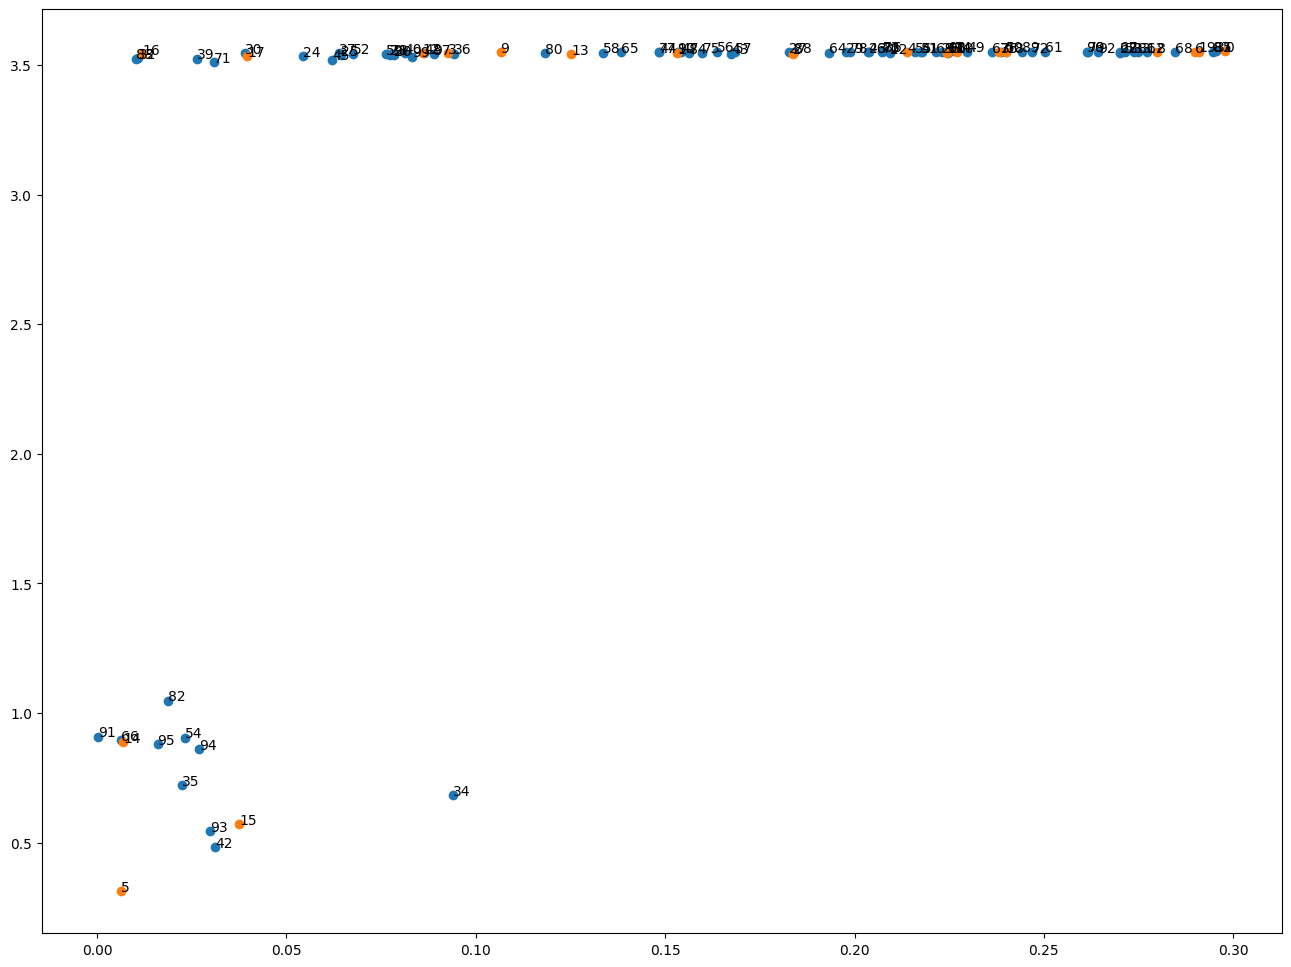

[2.97910163e-01 1.53220826e-01 1.83659868e-01 9.26191816e-02
 2.13844593e-01 6.27837980e-03 2.89779225e-01 2.38265773e-01
 2.79822967e-01 1.06560018e-01 2.26933875e-01 2.24469704e-01
 8.59668072e-02 1.25225228e-01 6.85177675e-03 3.75781305e-02
 1.19629703e-02 3.96666902e-02 2.40024726e-01 2.90920606e-01
 7.83558346e-02 7.74617180e-02 2.09342084e-01 2.03712968e-01
 5.45033670e-02 6.45179456e-02 2.22977599e-01 1.82802197e-01
 2.70079446e-01 1.97623206e-01 3.89891739e-02 2.95551208e-01
 1.09339099e-02 2.73868882e-01 9.39750535e-02 2.24849940e-02
 9.41454935e-02 6.38528531e-02 7.76722308e-02 2.63249718e-02
 8.12571593e-02 2.17703738e-01 3.12692066e-02 1.67437805e-01
 1.48473632e-01 6.20528182e-02 2.03636881e-01 1.54172753e-01
 8.64598938e-02 2.29780458e-01 2.39917584e-01 2.17433570e-01
 6.75730559e-02 2.71498098e-01 2.31935324e-02 2.15892783e-01
 1.63560970e-01 1.68441764e-01 1.33679545e-01 7.63467592e-02
 2.24768216e-01 2.50292794e-01 2.77141700e-01 2.36387227e-01
 1.93330750e-01 1.383419

In [12]:
plt.figure(figsize=(16,12))
np_mulogvar = []
for i in range(len(vi.mulogvar_list_for_mixture_of_gaussian_belief)):
    np_mulogvar.append(vi.mulogvar_list_for_mixture_of_gaussian_belief[i].numpy())
np_mulogvar = np.array(np_mulogvar)

plt.plot(debug_info[vi.validdata_num:,1], np_mulogvar[vi.validdata_num:,0], "o")
plt.plot(debug_info[:vi.validdata_num,1], np_mulogvar[:vi.validdata_num,0], "o")

for i in range(len(debug_info)):
    plt.annotate(str(i), xy=(debug_info[i,1],  np_mulogvar[i,0]))
plt.show()
print(debug_info[:,1])
# plt.show()
print("摩擦係数-潜在変数")

平均-対数分散


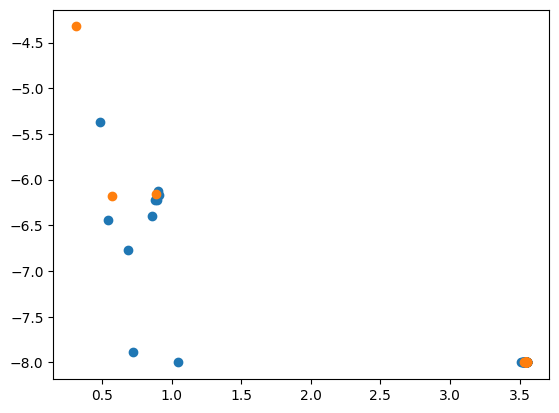

In [13]:
# plt.plot(np_mulogvar[vi.validdata_num:,0],np.exp(0.5*np_mulogvar[vi.validdata_num:,1]), "o")
# plt.plot(np_mulogvar[:vi.validdata_num,0],np.exp(0.5*np_mulogvar[:vi.validdata_num,1]),  "o")
# print("平均-標準偏差")
plt.plot(np_mulogvar[vi.validdata_num:,0],np_mulogvar[vi.validdata_num:,1], "o")
plt.plot(np_mulogvar[:vi.validdata_num,0],np_mulogvar[:vi.validdata_num,1],  "o")
print("平均-対数分散")

In [14]:
print(datetime.datetime.now())

2023-02-24 02:55:58.905814


In [15]:
train_curve, valid_curve = vi.train_initial_belief(num_iter=100000, lr=1e-3, early_stop_step=100)


train: iter 0  trainloss 6.17230  validloss 6.30885±0.00000  bestvalidloss 6.30885  last_update 0
train: iter 1  trainloss 5.64028  validloss 5.71622±0.00000  bestvalidloss 5.71622  last_update 0
train: iter 2  trainloss 5.20420  validloss 5.25953±0.00000  bestvalidloss 5.25953  last_update 0
train: iter 3  trainloss 4.79950  validloss 4.87009±0.00000  bestvalidloss 4.87009  last_update 0
train: iter 4  trainloss 4.48708  validloss 4.51286±0.00000  bestvalidloss 4.51286  last_update 0
train: iter 5  trainloss 4.20335  validloss 4.24273±0.00000  bestvalidloss 4.24273  last_update 0
train: iter 6  trainloss 3.95694  validloss 3.98748±0.00000  bestvalidloss 3.98748  last_update 0
train: iter 7  trainloss 3.74826  validloss 3.76144±0.00000  bestvalidloss 3.76144  last_update 0
train: iter 8  trainloss 3.55147  validloss 3.57349±0.00000  bestvalidloss 3.57349  last_update 0
train: iter 9  trainloss 3.39421  validloss 3.40068±0.00000  bestvalidloss 3.40068  last_update 0
train: iter 10  trai

train: iter 89  trainloss 1.32418  validloss 1.47980±0.00000  bestvalidloss 1.45962  last_update 9
train: iter 90  trainloss 1.33298  validloss 1.51082±0.00000  bestvalidloss 1.45962  last_update 10
train: iter 91  trainloss 1.32969  validloss 1.48131±0.00000  bestvalidloss 1.45962  last_update 11
train: iter 92  trainloss 1.33623  validloss 1.46968±0.00000  bestvalidloss 1.45962  last_update 12
train: iter 93  trainloss 1.32925  validloss 1.48799±0.00000  bestvalidloss 1.45962  last_update 13
train: iter 94  trainloss 1.33988  validloss 1.49728±0.00000  bestvalidloss 1.45962  last_update 14
train: iter 95  trainloss 1.32984  validloss 1.47433±0.00000  bestvalidloss 1.45962  last_update 15
train: iter 96  trainloss 1.33185  validloss 1.47767±0.00000  bestvalidloss 1.45962  last_update 16
train: iter 97  trainloss 1.33425  validloss 1.48785±0.00000  bestvalidloss 1.45962  last_update 17
train: iter 98  trainloss 1.33837  validloss 1.47901±0.00000  bestvalidloss 1.45962  last_update 18
t

train: iter 176  trainloss 1.32385  validloss 1.51380±0.00000  bestvalidloss 1.44146  last_update 14
train: iter 177  trainloss 1.32839  validloss 1.51041±0.00000  bestvalidloss 1.44146  last_update 15
train: iter 178  trainloss 1.33858  validloss 1.50470±0.00000  bestvalidloss 1.44146  last_update 16
train: iter 179  trainloss 1.32632  validloss 1.52113±0.00000  bestvalidloss 1.44146  last_update 17
train: iter 180  trainloss 1.32153  validloss 1.53807±0.00000  bestvalidloss 1.44146  last_update 18
train: iter 181  trainloss 1.32144  validloss 1.50545±0.00000  bestvalidloss 1.44146  last_update 19
train: iter 182  trainloss 1.32709  validloss 1.51628±0.00000  bestvalidloss 1.44146  last_update 20
train: iter 183  trainloss 1.33754  validloss 1.50952±0.00000  bestvalidloss 1.44146  last_update 21
train: iter 184  trainloss 1.33257  validloss 1.50141±0.00000  bestvalidloss 1.44146  last_update 22
train: iter 185  trainloss 1.32845  validloss 1.53502±0.00000  bestvalidloss 1.44146  last_

train: iter 261  trainloss 1.33063  validloss 1.53642±0.00000  bestvalidloss 1.44146  last_update 99
train: iter 262  trainloss 1.33211  validloss 1.53263±0.00000  bestvalidloss 1.44146  last_update 100
train: fin


In [16]:
print(vi.initial_belief)

Parameter containing:
tensor([ 3.2014, -0.1812], requires_grad=True)


In [17]:
# import torch
# from utils import kdl_var_approx
# x = torch.linspace(np_mulogvar[:,0].min()-0.5,np_mulogvar[:,0].max()+0.5,50)
# y = torch.linspace(np_mulogvar[:,1].min()-0.5,np_mulogvar[:,1].max()+0.5,50)

# data_xyz=[]
# for i in range(len(x)):
#     print(i)
#     for j in range(len(y)):
#         xy=torch.tensor([x[i],y[j]])
#         with torch.no_grad():
#             z = kdl_var_approx(torch.Tensor([x[i],y[j]]), vi.mulogvar_list_for_mixture_of_gaussian_belief)
#         data_xyz.append(torch.Tensor([x[i],y[j],z]))
# data_xyz = torch.vstack(data_xyz)


In [18]:
# # plt.scatter(data_xyz[:,0],data_xyz[:,1],c=data_xyz[:,2])
# # plt.colorbar()
# plt.scatter(data_xyz[:,0],data_xyz[:,1],c=torch.log(data_xyz[:,2]))
# plt.colorbar()
# i = torch.argmin(data_xyz[:,2])
# print(i,data_xyz[i])

In [22]:
vi.get_belief()

tensor([ 3.2014, -0.1812])

real train tensor([ 0.2534, -4.3477])
real test tensor([ 1.0694, -8.0000])
sim tensor([ 0.9781, -7.4799])


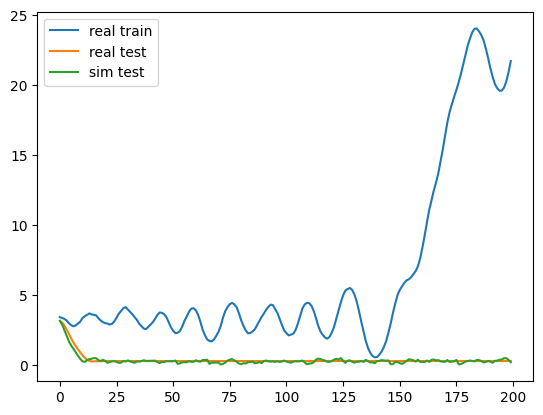

In [27]:
i = 5

tmp_data = 1 * vi.offline_data[i]
ds = tmp_data[1:,:vi.s_dim] - tmp_data[:-1,:vi.s_dim]
sads_array = np.hstack([tmp_data[:-1,:vi.sa_dim], ds])
print("real train",vi.get_belief(sads_array))
plt.plot(tmp_data[:,0], label="real train")

tmp_data = 1 * vi.debug_realenv_rolloutdata[i]
ds = tmp_data[1:,:vi.s_dim] - tmp_data[:-1,:vi.s_dim]
sads_array = np.hstack([tmp_data[:-1,:vi.sa_dim], ds])
print("real test",vi.get_belief(sads_array))
plt.plot(tmp_data[:,0], label="real test")

tmp_data = 1 * simdata1[i]
ds = tmp_data[1:,:vi.s_dim] - tmp_data[:-1,:vi.s_dim]
sads_array = np.hstack([tmp_data[:-1,:vi.sa_dim], ds])
print("sim", vi.get_belief(sads_array))
plt.plot(tmp_data[:,0], label="sim test")
plt.legend()